- KEYWORDS: scipy.optimize.fsolve, numpy.roots, numpy.polyder, numpy.polyval, numpy.polyint, numpy.poly1d



# Special nonlinear systems - polynomials



Polynomials are a special class of nonlinear algebraic equations that are especially easy to solve. A polynomial is linear in the coefficients in front of the variable. If we consider the following $n^{th}$ order polynomial:

$p_0 x^n + p_1 x^{(n-1)} + ... + p_{n-1} x + p_n = 0$

Let's be specific:

$x^2 + 8x + 16 = 0$

We express this as [1, 8, 16].



In [2]:
import numpy as np
?np.roots
p = [1, 8, 16]     # Eigen values of this function are the roots we get
r = np.roots(p)
r

array([-4., -4.])

Note we get all the roots. We can check that with the `numpy.polyval` command.



In [3]:
np.polyval(p, r)

array([0., 0.])

Note: If we use fsolve, it gives a lot of unwanted results. We've to iterate over various guesses to get our desired answer. If the ans is cx (say when we're solving EOS) then it's unclear by fsolve if soln even exists or are we not evaluating for right initial guess. This even gives us cx roots.

In [4]:
np.roots([1,0,2])

array([-0.+1.41421356j,  0.-1.41421356j])

Cx ans for x^2 + 2 = 0

We can also use this to plot a polynomial.



Text(0,0.5,'y')

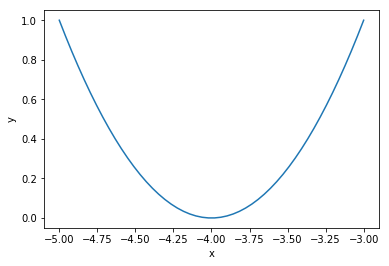

In [5]:
import numpy as np

x = np.linspace(-5, -3)
y = np.polyval(p, x)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

Why is this so convenient?




## Cubic equations of state



There are applications of polynomials in thermodynamics. The van der waal equation is a cubic polynomial $f(V) = V^3 - \frac{p n b + n R T}{p} V^2 + \frac{n^2 a}{p}V - \frac{n^3 a b}{p} = 0$, where $a$ and $b$ are constants, $p$ is the pressure, $R$ is the gas constant, $T$ is an absolute temperature and $n$ is the number of moles. The roots of this equation tell you the volume of the gas at those conditions.



In [6]:
# numerical values of the constants
a = 3.49e4  # exponential notation
b = 1.45
p = 679.7   # pressure in psi 
T = 683     # T in Rankine
n = 1.136   # lb-moles
R = 10.73   # ft^3 * psi / R / lb-mol

ppar = [1.0,                                    #V^3
        -(p * n * b + n * R * T) / p,           #V^2
        n**2 * a / p,                           #V
        -n**3 * a * b / p]                      #constant

print(np.roots(ppar))

[5.09432376+0.j         4.4006681 +1.43502848j 4.4006681 -1.43502848j]


In [7]:
r=np.roots(ppar)
r                    # First root is not imaginary. Let's try to print this

array([5.09432376+0.j        , 4.4006681 +1.43502848j,
       4.4006681 -1.43502848j])

In [8]:
r[0]

r[0].real, r[0].imag

(5.0943237645545985, 0.0)

Note that only one root is real (and even then, we have to interpret 0.j as not being imaginary. Also, in a cubic polynomial, there can only be two imaginary roots). In this case that means there is only one phase present.




## Other useful things to remember about polynomials



You can easily get the parameters of the derivative of the polynomial with `numpy.polyder`.



In [9]:
p = [1, 8, 16]

pd = np.polyder(p)
pd    # result must be f'(x) = 2x+8

array([2, 8])

In [10]:
np.polyder(ppar) # of our EOS

array([  3.        , -27.79131994,  66.26204267])

You can use these with `numpy.polyval` to compute the derivative at different points.



In [11]:
np.polyval(pd, [-10, -5, -3, 1, 2, 3]) #Recall that root is at -4

array([-12,  -2,   2,  10,  12,  14])

In [12]:
# We can take second derivative of the functions also

np.polyder(ppar, 2)

array([  6.        , -27.79131994])

In [13]:
p2 = [1,-1,2,-2]
np.roots(p2)

array([4.85722573e-16+1.41421356j, 4.85722573e-16-1.41421356j,
       1.00000000e+00+0.j        ])

In [14]:
#Sorting of roots
p3 = np.roots([1,3,2])
n = sorted(p3, reverse=True)
n

[-1.0, -2.0]

In [15]:
p3.sort()
p3

array([-2., -1.])

You can also get the coefficients of the integral of the polynomial. The integration constant is assumed to be 0 by default.



In [16]:
p = [1,8,16]
pint = np.polyint(p)  # We can save the constant that is returned too.
pint

array([ 0.33333333,  4.        , 16.        ,  0.        ])

You can use this to compute definite integrals, e.g. from x=1 to x=2:



In [17]:
np.polyval(pint, 2) - np.polyval(pint, 1)

30.33333333333334

**exercise** Use another method to confirm the result above.

Finally, the syntax `np.polyval(pint, 2)` can be a little tedious. You can create a function with `numpy.poly1d` using the array of coefficients. Conveniently, you can use the function in the roots, polyder and polyint commands!



In [18]:
p = np.poly1d(pint)
p(2) - p(1)

30.33333333333334

In [19]:
np.roots(p)

array([-6.+3.46410162j, -6.-3.46410162j,  0.+0.j        ])


# Systems of nonlinear equations



Analogously to systems of ordinary differential equations, with systems of nonlinear equations we define functions that will return a zero for each equation in the system. Then we have to pass an initial guess for each variable to fsolve, and it will return an array of values, one for each variable.

It is considerably more difficult to visualize systems of nonlinear equations. With two equations and two unknowns it is sometimes easy to plot solutions, but not always.

\begin{align}
y &=& x^2 \\
y &=& 8 - x^2
\end{align}

One approach to visualizing this is to plot the two curves.



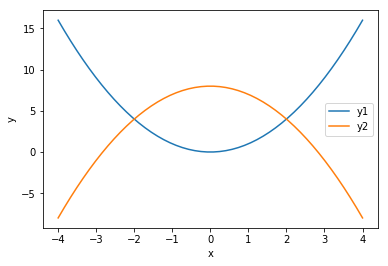

In [20]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-4, 4)

y1 = x**2
y2 = 8 - x**2

plt.plot(x, y1, x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y1', 'y2'])

You can see that on this domain, there is one place where the two curves intersect near the point (2, 5), which is a solution point. At this point there is one (x, y) pair that is a solution to *both* equations.



In [21]:
from scipy.optimize import fsolve

def objective(X):
    x, y = X
    z1 = y - x**2
    z2 = y - 8 + x**2        
    return np.array([z1, z2])

guess = [2, 5]
#Note: Here we know the eq & the kind of guess to be taken. If it's difficult, we'll take help of contours 
#to know where the solution approaches 0 as done in example next.
    
fsolve(objective, guess)

array([2., 4.])

It is not always easy to solve for one variable in terms of the other though. In that case, we can resort to an alternate graphical approach where we evaluate the objective function over a range of the variables, and look for regions where they overlap.

Consider the solution to these equations (adapted from [https://www.mathworks.com/help/optim/ug/fsolve.html](https://www.mathworks.com/help/optim/ug/fsolve.html)):

$e^{-e^{-(x_1 + x_2)}} = x_2 (1 + x_1^2)$

and

$x_1 \cos(x_2) + x_2 \sin(x_1) = 1/2$

It is not possible to solve either one for one variable in terms of the other. So instead, we will compute the objective function for a range of $x_1, x_2$ values, and then use a contour plot of each equation to see where there might be a solution.

The key to this visualization is where we draw the contours. A good choice is to highlight only the part of the solutions that bracket zero. Then we can see where they intersect, because there is probably a solution in that neighborhood.



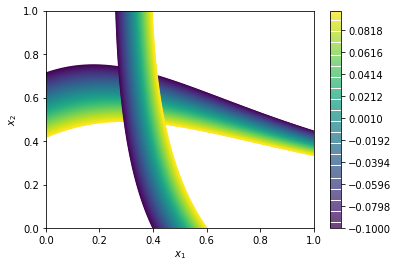

In [22]:
def objective(X):
    x1, x2 = X
    z1 = np.exp(-np.exp(-(x1 + x2))) - x2 * (1 + x1**2)
    z2 = x1 * np.cos(x2) + x2 * np.sin(x1) - 0.5
    return np.array([z1, z2])


x1 = np.linspace(0, 1)  #If we change this we get different region
x2 = np.linspace(0, 1)  #Is a 1-D array

X1, X2 = np.meshgrid(x1, x2)  #gives a meshgrid in our range of x. Is a 2-D array

Z1, Z2 = objective([X1, X2])  #Is a 2-D array

plt.contour(X1, X2, Z1, levels=np.linspace(-0.1, 0.1, 100))
plt.contour(X1, X2, Z2, levels=np.linspace(-0.1, 0.1, 100))
#Contour plots value of Z for different return values. Here we specify -0.1 to 0.1 because in between there is a 0.

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar()

In [23]:
Z1

array([[ 0.36787944,  0.37538667,  0.3828908 , ...,  0.68167275,
         0.68697023,  0.69220063],
       [ 0.3549785 ,  0.36247414,  0.36994666, ...,  0.64778588,
         0.65220879,  0.65654766],
       [ 0.34207448,  0.3495555 ,  0.35699344, ...,  0.61383192,
         0.6173803 ,  0.62082774],
       ...,
       [-0.27751093, -0.27261294, -0.26858102, ..., -0.97823812,
        -1.01362484, -1.04985498],
       [-0.2926216 , -0.2877992 , -0.28385983, ..., -1.01485732,
        -1.05109596, -1.08819439],
       [-0.30779937, -0.30305251, -0.29920558, ..., -1.05152095,
        -1.08861088, -1.12657698]])

[[ 0.36787944  0.37538667  0.3828908  ...  0.68167275  0.68697023
   0.69220063]
 [ 0.3549785   0.36247414  0.36994666 ...  0.64778588  0.65220879
   0.65654766]
 [ 0.34207448  0.3495555   0.35699344 ...  0.61383192  0.6173803
   0.62082774]
 ...
 [-0.27751093 -0.27261294 -0.26858102 ... -0.97823812 -1.01362484
  -1.04985498]
 [-0.2926216  -0.2877992  -0.28385983 ... -1.01485732 -1.05109596
  -1.08819439]
 [-0.30779937 -0.30305251 -0.29920558 ... -1.05152095 -1.08861088
  -1.12657698]]


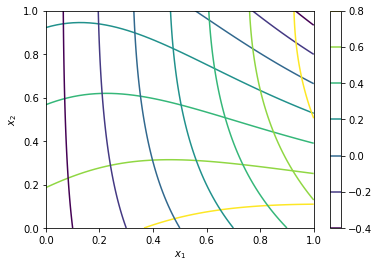

In [23]:
#we can go directly for our ans by removing levels in the contour plot
def objective(X):
    x1, x2 = X
    z1 = np.exp(-np.exp(-(x1 + x2))) - x2 * (1 + x1**2)
    z2 = x1 * np.cos(x2) + x2 * np.sin(x1) - 0.5
    return np.array([z1, z2])


x1 = np.linspace(0, 1)  #If we change this we get different region
x2 = np.linspace(0, 1)  #Is a 1-D array

X1, X2 = np.meshgrid(x1, x2)  #gives a meshgrid in our range of x. Is a 2-D array

Z1, Z2 = objective([X1, X2])  #Is a 2-D array
print(Z1)
plt.contour(X1, X2, Z1) #levels=np.linspace(-0.1, 0.1, 100))
plt.contour(X1, X2, Z2) #levels=np.linspace(-0.1, 0.1, 100))
#Contour plots value of Z for different return values. Here we specify -0.1 to 0.1 because in between there is a 0.

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar()

There is an intersection near $x_1=0.4$, and $x_2$ = 0.6. We can use that as an initial guess.



In [24]:
from scipy.optimize import fsolve
ans = fsolve(objective, [0.4, 0.6])  # note we do not need ans, because ans will have two values in it.
ans, objective(ans)

(array([0.35324662, 0.60608174]), array([-2.22044605e-16,  1.11022302e-16]))

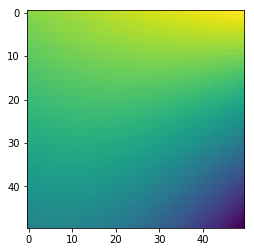

In [25]:
plt.imshow(Z1)

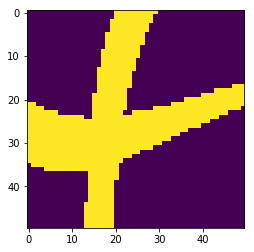

In [26]:
plt.imshow((Z1<0.1)&(Z1>-0.1) | (Z2<0.1)&(Z2>-0.1))  #The bar is a logical or, & is logical and

In [27]:
#The X & Y-axes are the element number of X1 and X2. By visualizing,we say our result is near (30,16). 
#To get X1 and X2 values at that index, we do:

a, b = X1[30, 18], X2[30, 18]
a,b

Za, Zb = objective([a, b])  #Is a 2-D array
Za, Zb  # Obviously not the right answer but close to 0

(-0.007893302890074949, 0.02050403802466083)

In [28]:
x1 = np.linspace(0,1,10)
x2 = np.linspace(0,1,10)

solns = []

for _x1 in x1:
    for _x2 in x2:
        ans, info, status, msg = fsolve(objective, [_x1, _x2], full_output=1)
        if status == 1:
            solns += [(np.round(ans[0], 6), np.round(ans[1], 6))]
        else:
            print(msg)
            
set(solns)  # set returns only a single value. 
# When we wrote => solns += [ans[0], ans[1]], we still got several ans. Only after rounding off were the similar ans removed

solns

[(0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247, 0.606082),
 (0.353247,

This shows the solution, and that the objective is practically equal to zero at that point.

You can see that trying to do this in more than 2 dimensions can quickly get difficult to visualize!




# Summary



-   We learned about a special class of nonlinear functions that are polynomials, and a series of useful functions to manipulate them.

-   We learned that you can use fsolve to find solutions to coupled non-linear algebraic equations.

-   Next time, we will apply this to solving a nonlinear boundary value differential equation.

